In [24]:
# In this notebook I will be compiling and cleaning the imported data and export into a csv to be analyzed in another notebook

In [25]:
# import dependencies and modules
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd
import time
import requests
from pprint import pprint

# import the keys / need to create keys 
# from api_keys import 


In [26]:
# import CSVs created in datacleaning notebook
combined_df = pd.read_csv('Data/transfer_data.csv')
clean_top_spenders = pd.read_csv('Data/club_spending_data.csv')
top_profitable_clubs = pd.read_csv('Data/club_profits_data.csv')
least_profitable_clubs = pd.read_csv('Data/club_losses_data.csv')
league_profits = pd.read_csv('Data/league_profits.csv')

In [27]:
# # create a chart showing all the purchases by club in the last 5 years
# plt.scatter(epl_clean_data['club_name'], epl_clean_data['fee_cleaned'])
# plt.xticks(rotation='vertical')
# plt.show()

# # Create a summary statistics table to measure
# print(f"Mean: {epl_clean_data['fee_cleaned'].mean()}")
# print(f"Median: {epl_clean_data['fee_cleaned'].median()}")
# print(f"Mode: {epl_clean_data['fee_cleaned'].mode()}")
# print(f"Max: {epl_clean_data['fee_cleaned'].max()}")
# print(f"Min: {epl_clean_data['fee_cleaned'].min()}")

In [28]:
combined_df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Leicester City,Islam Slimani,28,Centre-Forward,Sporting CP,£27.45m,in,Summer,27.45,Premier League,2016,2016/2017
1,Leicester City,Ahmed Musa,23,Left Winger,CSKA Moscow,£17.55m,in,Summer,17.55,Premier League,2016,2016/2017
2,Leicester City,Nampalys Mendy,24,Defensive Midfield,OGC Nice,£13.95m,in,Summer,13.95,Premier League,2016,2016/2017
3,Leicester City,Bartosz Kapustka,19,Attacking Midfield,Cracovia,£4.50m,in,Summer,4.50,Premier League,2016,2016/2017
4,Leicester City,Ron-Robert Zieler,27,Goalkeeper,Hannover 96,£3.15m,in,Summer,3.15,Premier League,2016,2016/2017


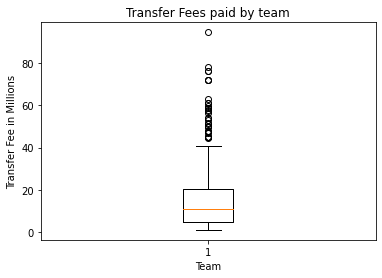

The lower quartile of transfer fees is: 4.95
The upper quartile of transfer fees is: 20.52
The interquartile range of transfer fees is: 15.57
The the median of transfer fees is: 11.16 
Values above 43.875 could be outliers.


In [29]:
# create epl_clean_data
epl_clean_data = combined_df[combined_df['league_name'] == 'Premier League']
# Create a boxplot to find the outliers
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Transfer Fee in Millions')
ax1.set_xlabel('Team')
ax1.set_title('Transfer Fees paid by team')
ax1.boxplot(epl_clean_data['fee_cleaned'])
plt.show()

# Print quartiles to find bounds
quartiles = epl_clean_data['fee_cleaned'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of transfer fees is: {lowerq}")
print(f"The upper quartile of transfer fees is: {upperq}")
print(f"The interquartile range of transfer fees is: {iqr}")
print(f"The the median of transfer fees is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [30]:
# # create a chart showing all the purchases by club in the last 5 years
# plt.scatter(fl1_clean_data['club_name'], fl1_clean_data['fee_cleaned'])
# plt.xticks(rotation='vertical')
# plt.show()

# # Create a summary statistics table to measure
# print(f"Mean: {fl1_clean_data['fee_cleaned'].mean()}")
# print(f"Median: {fl1_clean_data['fee_cleaned'].median()}")
# print(f"Mode: {fl1_clean_data['fee_cleaned'].mode()}")
# print(f"Max: {fl1_clean_data['fee_cleaned'].max()}")
# print(f"Min: {fl1_clean_data['fee_cleaned'].min()}")

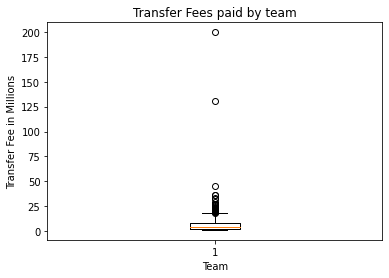

The lower quartile of transfer fees is: 2.0175
The upper quartile of transfer fees is: 8.4375
The interquartile range of transfer fees is: 6.42
The the median of transfer fees is: 3.6 
Values above 18.0675 could be outliers.


In [31]:
# create epl_clean_data
fl1_clean_data = combined_df[combined_df['league_name'] == 'Ligue 1']
# Create a boxplot to find the outliers
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Transfer Fee in Millions')
ax1.set_xlabel('Team')
ax1.set_title('Transfer Fees paid by team')
ax1.boxplot(fl1_clean_data['fee_cleaned'])
plt.show()

# Print quartiles to find bounds
quartiles_fl1 = fl1_clean_data['fee_cleaned'].quantile([.25,.5,.75])
lowerq_fl1 = quartiles_fl1[0.25]
upperq_fl1 = quartiles_fl1[0.75]
iqr_fl1 = upperq_fl1-lowerq_fl1

print(f"The lower quartile of transfer fees is: {lowerq_fl1}")
print(f"The upper quartile of transfer fees is: {upperq_fl1}")
print(f"The interquartile range of transfer fees is: {iqr_fl1}")
print(f"The the median of transfer fees is: {quartiles_fl1[0.5]} ")

lower_bound_fl1 = lowerq_fl1 - (1.5*iqr_fl1)
upper_bound_fl1 = upperq_fl1 + (1.5*iqr_fl1)
# print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound_fl1} could be outliers.")

In [32]:
# # create a chart showing all the purchases by club in the last 5 years
# plt.scatter(gbl_clean_data['club_name'], gbl_clean_data['fee_cleaned'])
# plt.xticks(rotation='vertical')
# plt.show()

# # Create a summary statistics table to measure
# print(f"Mean: {gbl_clean_data['fee_cleaned'].mean()}")
# print(f"Median: {gbl_clean_data['fee_cleaned'].median()}")
# print(f"Mode: {gbl_clean_data['fee_cleaned'].mode()}")
# print(f"Max: {gbl_clean_data['fee_cleaned'].max()}")
# print(f"Min: {gbl_clean_data['fee_cleaned'].min()}")

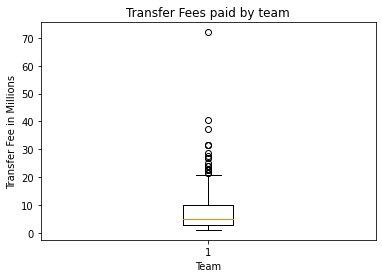

The lower quartile of transfer fees is: 2.7
The upper quartile of transfer fees is: 9.9
The interquartile range of transfer fees is: 7.2
The the median of transfer fees is: 4.95 
Values above 20.700000000000003 could be outliers.


In [33]:
# create epl_clean_data
gbl_clean_data = combined_df[combined_df['league_name'] == '1 Bundesliga']
# Create a boxplot to find the outliers
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Transfer Fee in Millions')
ax1.set_xlabel('Team')
ax1.set_title('Transfer Fees paid by team')
ax1.boxplot(gbl_clean_data['fee_cleaned'])
plt.show()



# Print quartiles to find bounds
quartiles_gb1 = gbl_clean_data['fee_cleaned'].quantile([.25,.5,.75])
lowerq_gb1 = quartiles_gb1[0.25]
upperq_gb1 = quartiles_gb1[0.75]
iqr_gb1 = upperq_gb1-lowerq_gb1

print(f"The lower quartile of transfer fees is: {lowerq_gb1}")
print(f"The upper quartile of transfer fees is: {upperq_gb1}")
print(f"The interquartile range of transfer fees is: {iqr_gb1}")
print(f"The the median of transfer fees is: {quartiles_gb1[0.5]} ")

lower_bound_gb1 = lowerq_gb1 - (1.5*iqr_gb1)
upper_bound_gb1 = upperq_gb1 + (1.5*iqr_gb1)
# print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound_gb1} could be outliers.")

In [34]:
# # create a chart showing all the purchases by club in the last 5 years
# plt.scatter(isa_clean_data['club_name'], isa_clean_data['fee_cleaned'])
# plt.xticks(rotation='vertical')
# plt.show()

# # Create a summary statistics table to measure
# print(f"Mean: {isa_clean_data['fee_cleaned'].mean()}")
# print(f"Median: {isa_clean_data['fee_cleaned'].median()}")
# print(f"Mode: {isa_clean_data['fee_cleaned'].mode()}")
# print(f"Max: {isa_clean_data['fee_cleaned'].max()}")
# print(f"Min: {isa_clean_data['fee_cleaned'].min()}")

In [99]:
isa_clean_data = combined_df[combined_df['league_name'] == 'Serie A']
is_fees = isa_clean_data['fee_cleaned']
is_fees

1256    6.03
1257    2.25
1258    5.76
1259    5.40
1260    4.50
        ... 
1834    6.75
1835    3.60
1836    3.15
1837    6.75
1838    1.35
Name: fee_cleaned, Length: 583, dtype: float64

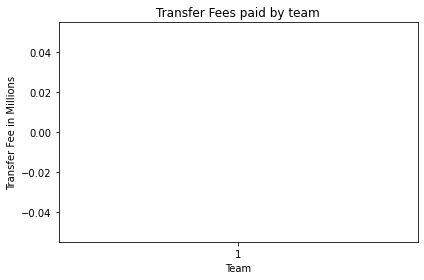

The lower quartile of transfer fees is: 2.25
The upper quartile of transfer fees is: 9.225
The interquartile range of transfer fees is: 6.975
The the median of transfer fees is: 4.5 
Values above 19.6875 could be outliers.


In [101]:
# create epl_clean_data
isa_clean_data = combined_df[combined_df['league_name'] == 'Serie A']
# Create a boxplot to find the outliers
# Not sure why onlt this one doesn't work.
isa_fees = isa_clean_data['fee_cleaned']
isa_fees
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Transfer Fee in Millions')
ax1.set_xlabel('Team')
ax1.set_title('Transfer Fees paid by team')
ax1.boxplot(isa_fees)
plt.tight_layout()
plt.show()

# Print quartiles to find bounds
quartiles_isa = isa_fees.quantile([.25,.5,.75])
lowerq_isa = quartiles_isa[0.25]
upperq_isa = quartiles_isa[0.75]
iqr_isa = upperq_isa-lowerq_isa

print(f"The lower quartile of transfer fees is: {lowerq_isa}")
print(f"The upper quartile of transfer fees is: {upperq_isa}")
print(f"The interquartile range of transfer fees is: {iqr_isa}")
print(f"The the median of transfer fees is: {quartiles_isa[0.5]} ")

lower_bound_isa = lowerq_isa - (1.5*iqr_isa)
upper_bound_isa = upperq_isa + (1.5*iqr_isa)
# print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound_isa} could be outliers.")

In [37]:
isa_fees

1256    6.03
1257    2.25
1258    5.76
1259    5.40
1260    4.50
        ... 
1834    6.75
1835    3.60
1836    3.15
1837    6.75
1838    1.35
Name: fee_cleaned, Length: 583, dtype: float64

In [38]:
# # create a chart showing all the purchases by club in the last 5 years
# plt.scatter(spd_clean_data['club_name'], spd_clean_data['fee_cleaned'])
# plt.xticks(rotation='vertical')
# plt.show()

# # Create a summary statistics table to measure
# print(f"Mean: {spd_clean_data['fee_cleaned'].mean()}")
# print(f"Median: {spd_clean_data['fee_cleaned'].median()}")
# print(f"Mode: {spd_clean_data['fee_cleaned'].mode()}")
# print(f"Max: {spd_clean_data['fee_cleaned'].max()}")
# print(f"Min: {spd_clean_data['fee_cleaned'].min()}")

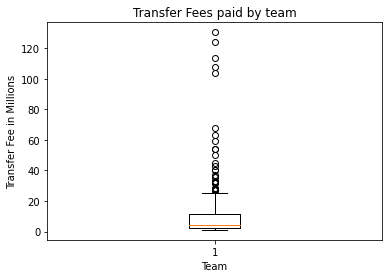

The lower quartile of transfer fees is: 2.25
The upper quartile of transfer fees is: 11.7
The interquartile range of transfer fees is: 9.45
The the median of transfer fees is: 4.5 
Values above 25.875 could be outliers.


In [39]:
# create epl_clean_data
spd_clean_data = combined_df[combined_df['league_name'] == 'Primera Division']
# Create a boxplot to find the outliers
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Transfer Fee in Millions')
ax1.set_xlabel('Team')
ax1.set_title('Transfer Fees paid by team')
ax1.boxplot(spd_clean_data['fee_cleaned'])
plt.show()

# Print quartiles to find bounds
quartiles_spd = spd_clean_data['fee_cleaned'].quantile([.25,.5,.75])
lowerq_spd = quartiles_spd[0.25]
upperq_spd = quartiles_spd[0.75]
iqr_spd = upperq_spd-lowerq_spd

print(f"The lower quartile of transfer fees is: {lowerq_spd}")
print(f"The upper quartile of transfer fees is: {upperq_spd}")
print(f"The interquartile range of transfer fees is: {iqr_spd}")
print(f"The the median of transfer fees is: {quartiles_spd[0.5]} ")

lower_bound_spd = lowerq_spd - (1.5*iqr_spd)
upper_bound_spd = upperq_spd + (1.5*iqr_spd)
# print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound_spd} could be outliers.")

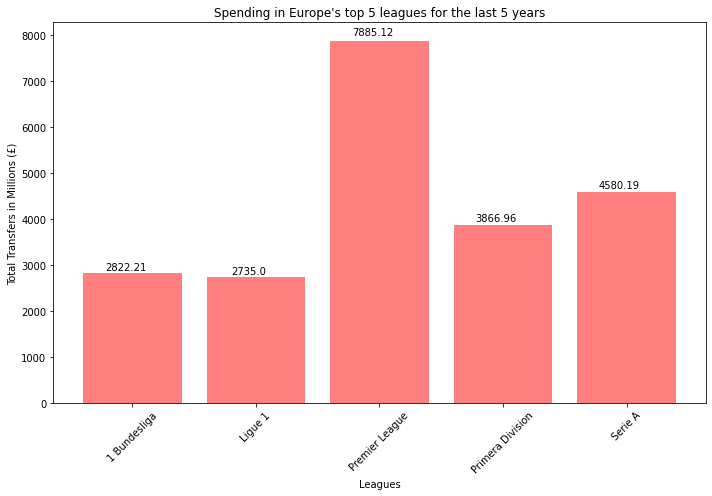

In [40]:
# Groupby league to see which league splashes the most cash
league_group = combined_df.groupby(['league_name'])
league_group.count()
league_spenders = round(league_group.sum(), 2)
league_spenders = league_spenders.reset_index()

# Make a bar graph to show the spending differences between leagues
fig, ax = plt.subplots(figsize=(10,7))
rects = plt.bar(league_spenders['league_name'],league_spenders['fee_cleaned'], color='r', alpha = 0.5, align='center')
plt.xticks(rotation=45)
plt.title("Spending in Europe's top 5 leagues for the last 5 years")
plt.ylabel('Total Transfers in Millions (£)')
plt.xlabel('Leagues')

# Attach labels to the plots
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'center': 'center', 'center': 'center'}
    offset = {'center': 0.5, 'center': 0.57, 'center': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects, "center")


# Save the graph
plt.tight_layout()
plt.savefig("Images/league_spending.png")
plt.show()

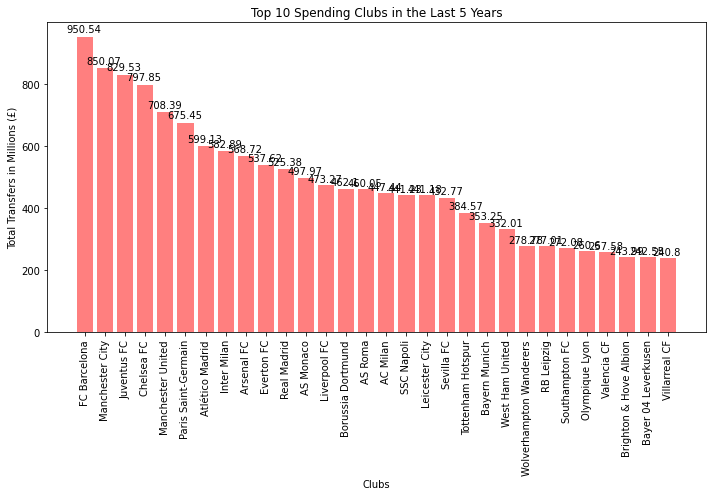

In [41]:
# Groupby club to see which are the big spenders
club_group = combined_df.groupby(['club_name'])
club_spenders = round(club_group.sum(), 2)
club_spenders = club_spenders.reset_index()

# Find the top 10 biggest spenders in europe
top_10_spenders = club_spenders.sort_values(by=['fee_cleaned'], ascending=False)
top_10_spenders = top_10_spenders.head(30)

# Make a bar graph to show the spending differences between leagues
fig, ax = plt.subplots(figsize=(10,7))
rects = plt.bar(top_10_spenders['club_name'],top_10_spenders['fee_cleaned'], color='r', alpha = 0.5, align='center')
plt.xticks(rotation=90)
plt.title("Top 10 Spending Clubs in the Last 5 Years")
plt.ylabel('Total Transfers in Millions (£)')
plt.xlabel('Clubs')


autolabel(rects, "center")

# Save the graph
plt.tight_layout()
plt.savefig("Images/club_spending.png")
plt.show()

In [42]:
# # Groupby league to see which league splashes the most cash
# league_seller_group = sellers_df.groupby(['league_name'])
# league_seller_group.count()
# league_sellers = round(league_seller_group.sum(),2)
# league_sellers = league_sellers.reset_index()

# # Make a bar graph to show the spending differences between leagues
# fig, ax = plt.subplots(figsize=(10,7))
# rects = plt.bar(league_sellers['league_name'],league_sellers['fee_cleaned'], color='g', alpha = 0.5, align='center')
# plt.xticks(rotation=45)
# plt.title("Transfer Revenue in Europe's top 5 leagues for the last 5 years")
# plt.ylabel('Total Transfers in Millions (£)')
# plt.xlabel('Leagues')

# autolabel(rects, "center")

# # Save the graph
# plt.tight_layout()
# plt.savefig("Images/league_sales.png")
# plt.show()


In [43]:
# # Groupby club to see which are the big sellers
# club_seller_group = sellers_df.groupby(['club_name'])
# club_sellers = round(club_seller_group.sum(), 2)
# club_sellers = club_sellers.reset_index()

# # Find the top 10 biggest spenders in europe
# top_10_sellers = club_sellers.sort_values(by=['fee_cleaned'], ascending=False)
# top_10_sellers = top_10_sellers.head(30)

# # Make a bar graph to show the spending differences between leagues
# fig, ax = plt.subplots(figsize=(10,7))
# rects = plt.bar(top_10_sellers['club_name'],top_10_sellers['fee_cleaned'], color='g', alpha = 0.5, align='center')
# plt.xticks(rotation=45)
# plt.title("Top 10 Clubs in Transfer Revenue in the Last 5 Years")
# plt.ylabel('Total Transfers in Millions (£)')
# plt.xlabel('Clubs')


# autolabel(rects, "center")

# # Save the graph
# plt.tight_layout()
# plt.savefig("Images/club_sales.png")
# plt.show()

In [44]:
top_profitable_clubs

,club_name,revenue,purchases,profit/loss,LgRk_2016,MP_2016,W_2016,D_2016,L_2016,GF_2016,...,GDiff_2020,Pts_2020,xG,xGA,xGDiff,xGDiff/90,W_Total,L_Total,LgRk_Avg,Pts_Total
0,Lyon,395.29,260.60,134.69,2.0,38.0,19.0,8.0,11.0,67.0,...,15.0,40.0,37.2,26.0,11.2,0.40,95.0,48.0,3.8,322.0
1,Lille,346.41,212.67,133.74,5.0,38.0,15.0,15.0,8.0,39.0,...,8.0,49.0,39.6,29.6,10.0,0.36,75.0,62.0,7.8,268.0
2,Dortmund,553.28,462.10,91.18,2.0,34.0,24.0,6.0,4.0,82.0,...,43.0,69.0,59.2,39.4,19.7,0.58,101.0,30.0,2.6,342.0
3,Saint-Étienne,138.33,50.40,87.93,6.0,38.0,17.0,7.0,14.0,42.0,...,-16.0,30.0,28.8,35.3,-6.6,-0.23,71.0,63.0,8.4,259.0
4,Sampdoria,270.51,188.11,82.40,15.0,38.0,10.0,10.0,18.0,48.0,...,-17.0,42.0,51.2,53.4,-2.2,-0.06,65.0,83.0,11.8,237.0
5,Hoffenheim,190.44,116.73,73.71,15.0,34.0,9.0,10.0,15.0,39.0,...,0.0,52.0,49.8,51.8,-2.1,-0.06,68.0,49.0,7.4,257.0
6,Atalanta,252.36,178.81,73.55,13.0,38.0,11.0,12.0,15.0,41.0,...,50.0,78.0,81.9,41.3,40.6,1.07,91.0,48.0,6.0,324.0
7,Monaco,571.19,497.97,73.22,3.0,38.0,17.0,14.0,7.0,57.0,...,0.0,40.0,48.0,39.9,8.2,0.29,90.0,44.0,6.4,316.0
8,Genoa,229.73,162.99,66.74,11.0,38.0,13.0,7.0,18.0,45.0,...,-26.0,39.0,47.4,59.5,-12.1,-0.32,51.0,92.0,14.6,200.0
9,Bordeaux,129.38,70.25,59.13,11.0,38.0,12.0,14.0,12.0,50.0,...,6.0,37.0,29.7,33.2,-3.5,-0.12,62.0,62.0,9.8,242.0


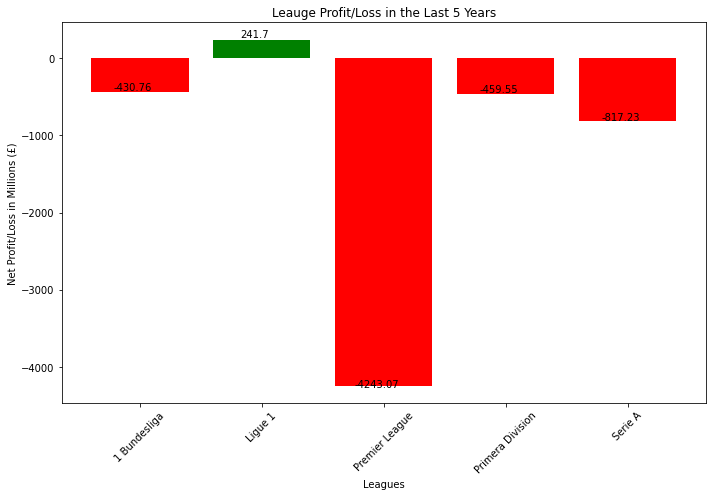

In [45]:
# create a bar graph of the profit/loss
# Make a bar graph to show the spending differences between leagues
league_profits['positive'] = league_profits['profit/loss'] > 0
fig, ax = plt.subplots(figsize=(10,7))
rects = plt.bar(league_profits['league_name'],league_profits['profit/loss'], color=league_profits.positive.map({True: 'g', False: 'r'}), align='center')
plt.xticks(rotation=45)
plt.title("Leauge Profit/Loss in the Last 5 Years")
plt.ylabel('Net Profit/Loss in Millions (£)')
plt.xlabel('Leagues')


autolabel(rects, "center")

# Save the graph
plt.tight_layout()
plt.savefig("Images/league_profit_loss.png")
plt.show()

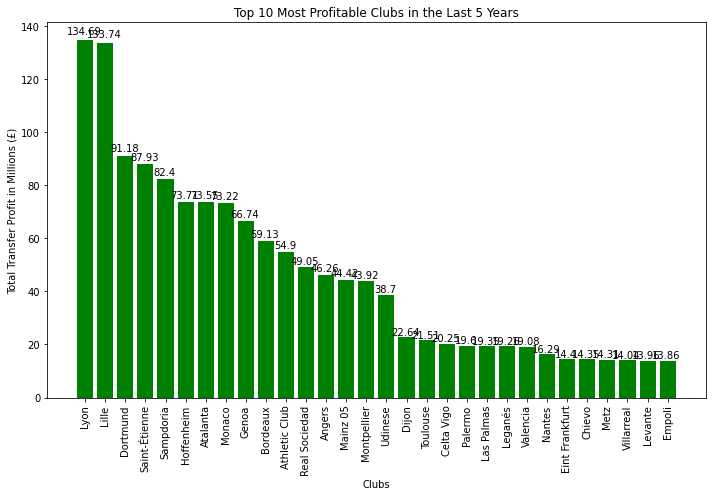

In [46]:
# Make a bar graph to show the spending differences between clubs
fig, ax = plt.subplots(figsize=(10,7))
rects = plt.bar(top_profitable_clubs['club_name'],top_profitable_clubs['profit/loss'], color='g', align='center')
plt.xticks(rotation=90)
plt.title("Top 10 Most Profitable Clubs in the Last 5 Years")
plt.ylabel('Total Transfer Profit in Millions (£)')
plt.xlabel('Clubs')


autolabel(rects, "center")

# Save the graph
plt.tight_layout()
plt.savefig("Images/club_profits.png")
plt.show()

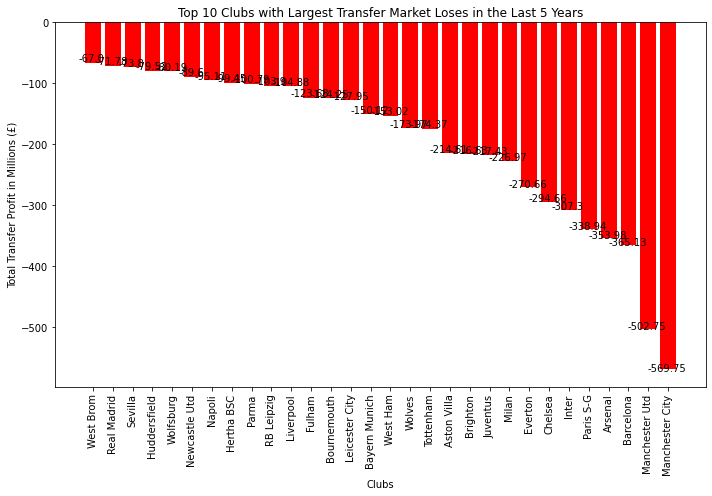

In [47]:
# Make a bar graph to show the spending differences between clubs
fig, ax = plt.subplots(figsize=(10,7))
rects = plt.bar(least_profitable_clubs['club_name'],least_profitable_clubs['profit/loss'], color='r', align='center')
plt.xticks(rotation=90)
plt.title("Top 10 Clubs with Largest Transfer Market Loses in the Last 5 Years")
plt.ylabel('Total Transfer Profit in Millions (£)')
plt.xlabel('Clubs')


autolabel(rects, "center")

# Save the graph
plt.tight_layout()
plt.savefig("Images/club_losses.png")
plt.show()

In [48]:
# Most expensive players
expensive_players = combined_df.sort_values(by=['fee_cleaned'], ascending=False)
# top 10
top_expensive_players = expensive_players.head(30)
top_expensive_players

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
620,Paris Saint-Germain,Neymar,25,Left Winger,FC Barcelona,£199.80m,in,Summer,199.80,Ligue 1,2017,2017/2018
686,Paris Saint-Germain,Kylian Mbappé,19,Centre-Forward,Monaco,£130.50m,in,Summer,130.50,Ligue 1,2018,2018/2019
1963,FC Barcelona,Philippe Coutinho,25,Attacking Midfield,Liverpool,£130.50m,in,Winter,130.50,Primera Division,2017,2017/2018
1904,FC Barcelona,Ousmane Dembélé,20,Right Winger,Bor. Dortmund,£124.20m,in,Summer,124.20,Primera Division,2017,2017/2018
2070,Atlético Madrid,João Félix,19,Second Striker,Benfica,£113.40m,in,Summer,113.40,Primera Division,2019,2019/2020
2064,FC Barcelona,Antoine Griezmann,28,Second Striker,Atlético Madrid,£108.00m,in,Summer,108.00,Primera Division,2019,2019/2020
1532,Juventus FC,Cristiano Ronaldo,33,Left Winger,Real Madrid,£105.30m,in,Summer,105.30,Serie A,2018,2018/2019
2076,Real Madrid,Eden Hazard,28,Left Winger,Chelsea,£103.50m,in,Summer,103.50,Primera Division,2019,2019/2020
22,Manchester United,Paul Pogba,23,Central Midfield,Juventus,£94.50m,in,Summer,94.50,Premier League,2016,2016/2017
1293,Juventus FC,Gonzalo Higuaín,28,Centre-Forward,SSC Napoli,£81.00m,in,Summer,81.00,Serie A,2016,2016/2017


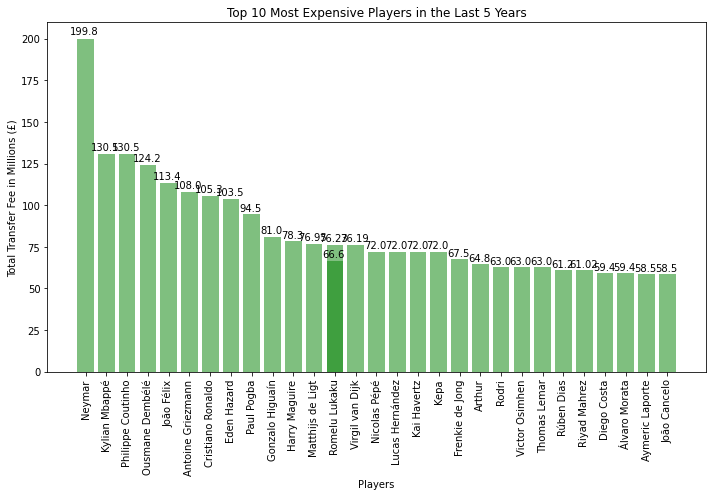

In [49]:
# Make a bar graph to show the most expensive players
fig, ax = plt.subplots(figsize=(10,7))
rects = plt.bar(top_expensive_players['player_name'],top_expensive_players['fee_cleaned'], color='g', alpha = 0.5, align='center')
plt.xticks(rotation=90)
plt.title("Top 10 Most Expensive Players in the Last 5 Years")
plt.ylabel('Total Transfer Fee in Millions (£)')
plt.xlabel('Players')


autolabel(rects, "center")

# Save the graph
plt.tight_layout()
plt.savefig("Images/top_10_players.png")
plt.show()

In [50]:
top_profitable_clubs

,club_name,revenue,purchases,profit/loss,LgRk_2016,MP_2016,W_2016,D_2016,L_2016,GF_2016,...,GDiff_2020,Pts_2020,xG,xGA,xGDiff,xGDiff/90,W_Total,L_Total,LgRk_Avg,Pts_Total
0,Lyon,395.29,260.60,134.69,2.0,38.0,19.0,8.0,11.0,67.0,...,15.0,40.0,37.2,26.0,11.2,0.40,95.0,48.0,3.8,322.0
1,Lille,346.41,212.67,133.74,5.0,38.0,15.0,15.0,8.0,39.0,...,8.0,49.0,39.6,29.6,10.0,0.36,75.0,62.0,7.8,268.0
2,Dortmund,553.28,462.10,91.18,2.0,34.0,24.0,6.0,4.0,82.0,...,43.0,69.0,59.2,39.4,19.7,0.58,101.0,30.0,2.6,342.0
3,Saint-Étienne,138.33,50.40,87.93,6.0,38.0,17.0,7.0,14.0,42.0,...,-16.0,30.0,28.8,35.3,-6.6,-0.23,71.0,63.0,8.4,259.0
4,Sampdoria,270.51,188.11,82.40,15.0,38.0,10.0,10.0,18.0,48.0,...,-17.0,42.0,51.2,53.4,-2.2,-0.06,65.0,83.0,11.8,237.0
5,Hoffenheim,190.44,116.73,73.71,15.0,34.0,9.0,10.0,15.0,39.0,...,0.0,52.0,49.8,51.8,-2.1,-0.06,68.0,49.0,7.4,257.0
6,Atalanta,252.36,178.81,73.55,13.0,38.0,11.0,12.0,15.0,41.0,...,50.0,78.0,81.9,41.3,40.6,1.07,91.0,48.0,6.0,324.0
7,Monaco,571.19,497.97,73.22,3.0,38.0,17.0,14.0,7.0,57.0,...,0.0,40.0,48.0,39.9,8.2,0.29,90.0,44.0,6.4,316.0
8,Genoa,229.73,162.99,66.74,11.0,38.0,13.0,7.0,18.0,45.0,...,-26.0,39.0,47.4,59.5,-12.1,-0.32,51.0,92.0,14.6,200.0
9,Bordeaux,129.38,70.25,59.13,11.0,38.0,12.0,14.0,12.0,50.0,...,6.0,37.0,29.7,33.2,-3.5,-0.12,62.0,62.0,9.8,242.0


The correlation between both factors is 0.67
The r-squared is: 0.44820748657979265


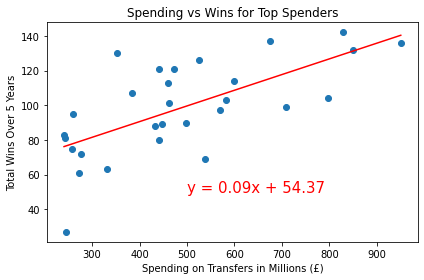

In [82]:
# now lets make some graphs on spending vs wins
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(clean_top_spenders['fee_cleaned'], clean_top_spenders['W_Total'])
regress_values = clean_top_spenders['fee_cleaned'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(clean_top_spenders['fee_cleaned'],clean_top_spenders['W_Total'])
plt.plot(clean_top_spenders['fee_cleaned'],regress_values,"r-")
plt.annotate(line_eq,(500,50),fontsize=15,color="red")
plt.title('Spending vs Wins for Top Spenders')
plt.ylabel('Total Wins Over 5 Years')
plt.xlabel('Spending on Transfers in Millions (£)')

# look for correlation
correlation = st.pearsonr(clean_top_spenders['fee_cleaned'],clean_top_spenders['W_Total'])
print(f"The correlation between both factors is {round(correlation[0], 2)}")
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/spending_v_wins.png")
plt.show()

In [53]:
st.ttest_ind(clean_top_spenders['fee_cleaned'], clean_top_spenders['W_Total'], equal_var=False)

Ttest_indResult(statistic=10.416159199538967, pvalue=2.5741895304617124e-11)

The correlation between both factors is 0.66
The r-squared is: 0.42961465928298326


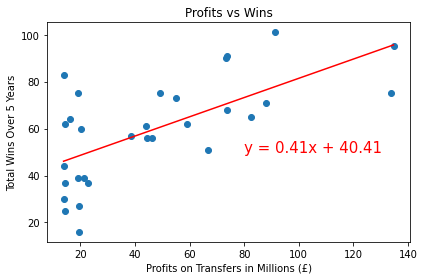

In [81]:
# now lets make some graphs on spending vs wins
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(top_profitable_clubs['profit/loss'], top_profitable_clubs['W_Total'])
regress_values = top_profitable_clubs['profit/loss'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(top_profitable_clubs['profit/loss'],top_profitable_clubs['W_Total'])
plt.plot(top_profitable_clubs['profit/loss'],regress_values,"r-")
plt.annotate(line_eq,(80,50),fontsize=15,color="red")

# make another one looking at profitable teams vs wins
# plt.scatter(top_profitable_clubs['profit/loss'], top_profitable_clubs['W_Total'])
plt.title('Profits vs Wins')
plt.ylabel('Total Wins Over 5 Years')
plt.xlabel('Profits on Transfers in Millions (£)')
# look for correlation
correlation = st.pearsonr(top_profitable_clubs['profit/loss'],top_profitable_clubs['W_Total'])
print(f"The correlation between both factors is {round(correlation[0], 2)}")
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/profits_v_wins.png")
plt.show()

The correlation between both factors is -0.43
The r-squared is: 0.18784390398284287


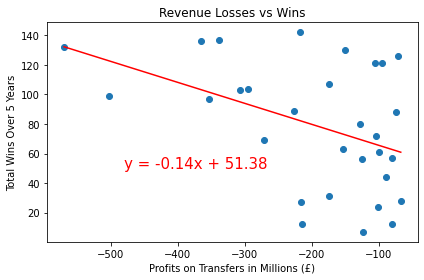

In [79]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(least_profitable_clubs['profit/loss'], least_profitable_clubs['W_Total'])
regress_values = least_profitable_clubs['profit/loss'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(least_profitable_clubs['profit/loss'], least_profitable_clubs['W_Total'])
plt.plot(least_profitable_clubs['profit/loss'],regress_values,"r-")
plt.annotate(line_eq,(-480,50),fontsize=15,color="red")

# make another one looking at unprofitable teams vs wins

plt.title('Revenue Losses vs Wins')
plt.ylabel('Total Wins Over 5 Years')
plt.xlabel('Profits on Transfers in Millions (£)')
# look for correlation
correlation = st.pearsonr(least_profitable_clubs['profit/loss'],least_profitable_clubs['W_Total'])
print(f"The correlation between both factors is {round(correlation[0], 2)}")
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/losses_v_wins.png")
plt.show()

In [65]:
# plt.scatter(clean_top_spenders['fee_cleaned'],clean_top_spenders['Pts_Total'])
# plt.title('Spending vs League Points for Top Spenders')
# plt.ylabel('Total Points Over 5 Years')
# plt.xlabel('Spending on Transfers in Millions (£)')
# plt.show()

The correlation between both factors is -0.52
The r-squared is: 0.27102707397267


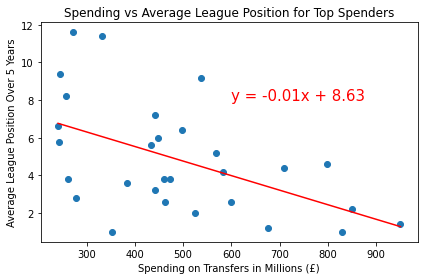

In [78]:
# create plot with regression line to determine correlation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(clean_top_spenders['fee_cleaned'], clean_top_spenders['LgRk_Avg'])
regress_values = clean_top_spenders['fee_cleaned'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(clean_top_spenders['fee_cleaned'], clean_top_spenders['LgRk_Avg'])
plt.plot(clean_top_spenders['fee_cleaned'],regress_values,"r-")
plt.annotate(line_eq,(600,8),fontsize=15,color="red")

# edit the figure
# plt.scatter(clean_top_spenders['fee_cleaned'],clean_top_spenders['LgRk_Avg'])
plt.title('Spending vs Average League Position for Top Spenders')
plt.ylabel('Average League Position Over 5 Years')
plt.xlabel('Spending on Transfers in Millions (£)')
# look for correlation
correlation = st.pearsonr(clean_top_spenders['fee_cleaned'],clean_top_spenders['LgRk_Avg'])
print(f"The correlation between both factors is {round(correlation[0], 2)}")
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/spending_v_lgrk.png")
plt.show()

In [54]:
st.ttest_ind(clean_top_spenders['fee_cleaned'], clean_top_spenders['LgRk_Avg'], equal_var=False)

Ttest_indResult(statistic=13.037092970161845, pvalue=2.0425314254857977e-13)

The correlation between both factors is -0.48
The r-squared is: 0.23115101323562373


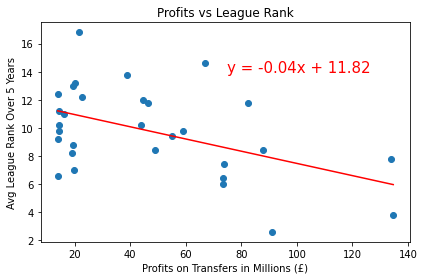

In [77]:
# create plot with regression line to determine correlation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(top_profitable_clubs['profit/loss'], top_profitable_clubs['LgRk_Avg'])
regress_values = top_profitable_clubs['profit/loss'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(top_profitable_clubs['profit/loss'], top_profitable_clubs['LgRk_Avg'])
plt.plot(top_profitable_clubs['profit/loss'],regress_values,"r-")
plt.annotate(line_eq,(75,14),fontsize=15,color="red")
# make another one looking at profitable teams vs wins

plt.title('Profits vs League Rank')
plt.ylabel('Avg League Rank Over 5 Years')
plt.xlabel('Profits on Transfers in Millions (£)')
# look for correlation
correlation = st.pearsonr(top_profitable_clubs['profit/loss'],top_profitable_clubs['LgRk_Avg'])
print(f"The correlation between both factors is {round(correlation[0], 2)}")
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/profits_v_lgrk.png")
plt.show()

The correlation between both factors is 0.33
The r-squared is: 0.11194490734100138


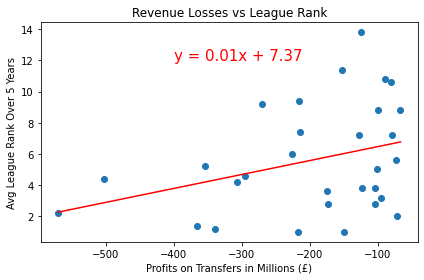

In [76]:
# create plot with regression line to determine correlation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(least_profitable_clubs['profit/loss'], least_profitable_clubs['LgRk_Avg'])
regress_values = least_profitable_clubs['profit/loss'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(least_profitable_clubs['profit/loss'],regress_values,"r-")
plt.annotate(line_eq,(-400,12),fontsize=15,color="red")
# make another one looking at profitable teams vs wins
plt.scatter(least_profitable_clubs['profit/loss'], least_profitable_clubs['LgRk_Avg'])
plt.title('Revenue Losses vs League Rank')
plt.ylabel('Avg League Rank Over 5 Years')
plt.xlabel('Profits on Transfers in Millions (£)')
# look for correlation
correlation = st.pearsonr(least_profitable_clubs['profit/loss'],least_profitable_clubs['LgRk_Avg'])
print(f"The correlation between both factors is {round(correlation[0], 2)}")
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Images/loses_v_lgrk.png")
plt.show()